In [50]:
import numpy as np
import ROOT as rt
rt.gStyle.SetOptStat(0)

In [2]:
"""samples.npy  testset_codes.npy  testset_imgs.npy  testset_recons.npy"""
samples  = np.load("samples.npy")
testimg  = np.load("testset_imgs.npy")
testreco = np.load("testset_recons.npy")
testcode = np.load("testset_codes.npy")
print samples.shape
print testimg.shape
print testreco.shape
print testcode.shape

(30, 64, 64, 1)
(30, 64, 64, 1)
(30, 64, 64, 1)
(30, 16, 16)


In [62]:
def make_hist_from_array( arr, hname ):
    h = rt.TH2D( hname, "", arr.shape[0], 0, arr.shape[0], arr.shape[1], 0, arr.shape[1] )
    for x in range( arr.shape[0] ):
        for y in range( arr.shape[1] ):
            val = arr[x,y]
            if arr[x,y]<0.1:
                val = 0.01
            h.SetBinContent( x+1, y+1, val)
    return h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: csample


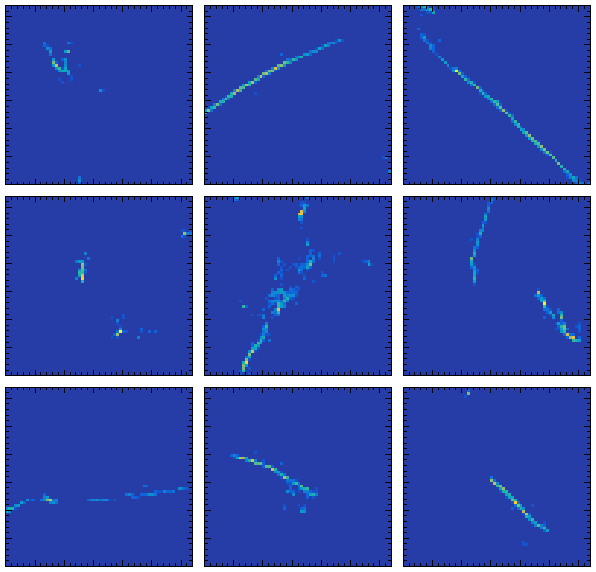

In [63]:
rt.gStyle.SetPadBottomMargin(0)
rt.gStyle.SetPadTopMargin(0)
rt.gStyle.SetPadLeftMargin(0)
rt.gStyle.SetPadRightMargin(0)
rt.gStyle.SetPadTickX(1);
rt.gStyle.SetPadTickY(1);
csample = rt.TCanvas("csample","csample",600,600)
csample.SetFrameFillColor(0);
csample.SetFrameFillStyle(0);
csample.SetFrameLineColor(0);
csample.SetFrameBorderMode(0);  
csample.Divide(3,3);

filled = []
while len(filled)<9:
    p = np.random.randint(0,30)
    if p not in filled:
        filled.append(p)

hsamplelist = []
for n,i in enumerate(filled):
    csample.cd( 3*(n/3) + n%3 + 1 )
    h = make_hist_from_array( samples[i,:,:,0], "sample%d"%(i))
    h.Draw("col")
    h.GetZaxis().SetRangeUser(0,10.0)
    h.GetXaxis().SetLabelSize(0)
    h.GetYaxis().SetLabelSize(0)
    h.GetZaxis().SetLabelSize(0)
    hsamplelist.append(h)
csample.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctestimg


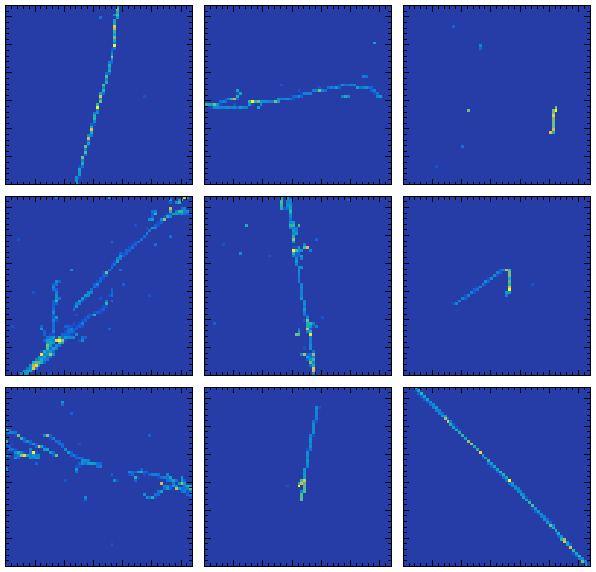

In [64]:
rt.gStyle.SetPadBottomMargin(0)
rt.gStyle.SetPadTopMargin(0)
rt.gStyle.SetPadLeftMargin(0)
rt.gStyle.SetPadRightMargin(0)
rt.gStyle.SetPadTickX(1);
rt.gStyle.SetPadTickY(1);
ctestimg = rt.TCanvas("ctestimg","ctestimg",600,600)
ctestimg.SetFrameFillColor(0);
ctestimg.SetFrameFillStyle(0);
ctestimg.SetFrameLineColor(0);
ctestimg.SetFrameBorderMode(0);  
ctestimg.Divide(3,3);

filled = []
while len(filled)<9:
    p = np.random.randint(0,30)
    if p not in filled:
        filled.append(p)

htestimglist = []
for n,i in enumerate(filled):
    ctestimg.cd( 3*(n/3) + n%3 + 1 )
    h = make_hist_from_array( testimg[i,:,:,0], "testimg%d"%(i))
    h.Draw("col")
    h.GetZaxis().SetRangeUser(0,10.0)
    h.GetXaxis().SetLabelSize(0)
    h.GetYaxis().SetLabelSize(0)
    h.GetZaxis().SetLabelSize(0)
    htestimglist.append(h)
ctestimg.Draw()